In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

results_dir = "../results"

baseline_path = "../results/logistic_baseline_results.csv"
logistic_path = "../results/logistic_results.csv"
xgb_path = "../results/xgb_results.csv"

dfs = []
for p in [baseline_path, logistic_path, xgb_path]:
    if os.path.exists(p):
        dfs.append(pd.read_csv(p))

results = pd.concat(dfs, ignore_index=True)
results

,Model,AUC,PR-AUC,Recall,Precision,F1
0,Logistic-Baseline,0.972088,0.718935,0.918367,0.061017,0.114431
1,Logistic-L2,0.972088,0.718935,0.918367,0.061017,0.114431
2,Logistic-L1,0.972070,0.718934,0.918367,0.061017,0.114431
3,XGBoost,0.985950,0.856498,0.887755,0.557692,0.685039


In [7]:
# Sort by PR-AUC (more relevant for imbalanced fraud detection)
results_sorted_pra = results.sort_values(by="PR-AUC", ascending=False)
results_sorted_pra


,Model,AUC,PR-AUC,Recall,Precision,F1
3,XGBoost,0.985950,0.856498,0.887755,0.557692,0.685039
0,Logistic-Baseline,0.972088,0.718935,0.918367,0.061017,0.114431
1,Logistic-L2,0.972088,0.718935,0.918367,0.061017,0.114431
2,Logistic-L1,0.972070,0.718934,0.918367,0.061017,0.114431


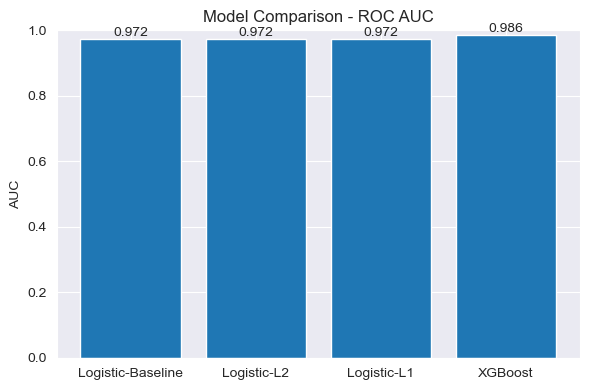

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(results["Model"], results["AUC"])
plt.title("Model Comparison - ROC AUC")
plt.ylabel("AUC")
plt.ylim(0.0, 1.0)
for i, v in enumerate(results["AUC"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.tight_layout()
plt.show()


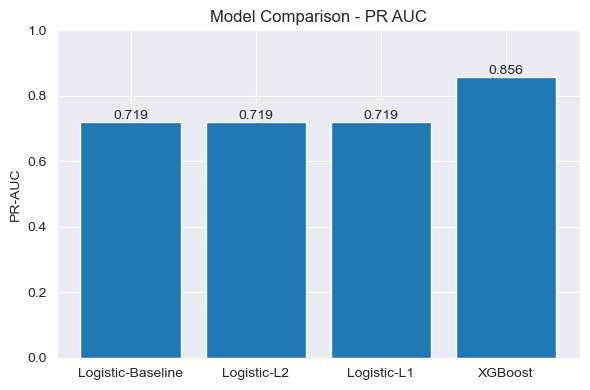

In [9]:
plt.figure(figsize=(6, 4))
plt.bar(results["Model"], results["PR-AUC"])
plt.title("Model Comparison - PR AUC")
plt.ylabel("PR-AUC")
plt.ylim(0.0, 1.0)
for i, v in enumerate(results["PR-AUC"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import os

# Ensure results folder exists
os.makedirs("../results", exist_ok=True)

# Create unified results table
results_all = pd.DataFrame([
    ["Logistic-Baseline", auc_base, pra_base, recall_base, precision_base, f1_base],
    ["Logistic-L2",       auc_l2,   pra_l2,   recall_l2,   precision_l2,   f1_l2],
    ["Logistic-L1",       auc_l1,   pra_l1,   recall_l1,   precision_l1,   f1_l1],
    ["XGBoost",           auc_xgb,  pra_xgb,  recall_xgb,  precision_xgb,  f1_xgb]
], columns=["Model", "AUC", "PR-AUC", "Recall", "Precision", "F1"])

# Save to CSV
results_all.to_csv("../results/model_results_all.csv", index=False)

print("Saved combined model results to ../results/model_results_all.csv")
results_all


NameError: name 'auc_base' is not defined

In [11]:
import pandas as pd
import os

os.makedirs("../results", exist_ok=True)

results_all = pd.DataFrame([
    ["Logistic-Baseline", 0.972088, 0.718935, 0.918367, 0.061017, 0.114431],
    ["Logistic-L2",       0.972088, 0.718935, 0.918367, 0.061017, 0.114431],
    ["Logistic-L1",       0.972070, 0.718934, 0.918367, 0.061017, 0.114431],
    ["XGBoost",           0.985950, 0.856498, 0.887755, 0.557692, 0.685039]
], columns=["Model", "AUC", "PR-AUC", "Recall", "Precision", "F1"])

results_all.to_csv("../results/model_results_all.csv", index=False)
results_all


,Model,AUC,PR-AUC,Recall,Precision,F1
0,Logistic-Baseline,0.972088,0.718935,0.918367,0.061017,0.114431
1,Logistic-L2,0.972088,0.718935,0.918367,0.061017,0.114431
2,Logistic-L1,0.972070,0.718934,0.918367,0.061017,0.114431
3,XGBoost,0.985950,0.856498,0.887755,0.557692,0.685039
